### Task 1
1. Read `apartments_data_wintherthur.csv`
2. Create a DataFrame with the following columns: rooms, area, price, address, plz, city, canton, description. rooms_area_price_raw,address_raw,price_raw,description_raw,text_raw


In [1]:
import pandas as pd
import numpy as np
import re

# Read apartments_data_winterthur.csv
df_winterthur_raw = pd.read_csv('apartments_data_winterthur.csv')
print(f"Raw data shape: {df_winterthur_raw.shape}")
print(f"\nColumns: {df_winterthur_raw.columns.tolist()}")
print(f"\nFirst row of raw data:")
print(df_winterthur_raw.iloc[0])


Raw data shape: (120, 7)

Columns: ['web-scraper-order', 'web-scraper-start-url', 'rooms_area_price_raw', 'address_raw', 'price_raw', 'description_raw', 'text_raw']

First row of raw data:
web-scraper-order                                             1693993818-1
web-scraper-start-url    https://www.immoscout24.ch/de/wohnung/mieten/o...
rooms_area_price_raw                        6,5 Zimmer, 143 m², CHF 3017.—
address_raw                          Am Eulachpark 25, 8404 Winterthur, ZH
price_raw                                                       CHF 3017.—
description_raw              «Sie suchen die spezielle Maisonettewohnung?»
text_raw                 6,5 Zimmer, 143 m², CHF 3017.—Am Eulachpark 25...
Name: 0, dtype: object


In [2]:
# Helper function to parse rooms, area, and price from the raw column
def parse_rooms_area_price(raw_str):
    """Extract rooms, area, and price from a raw string like '6,5 Zimmer, 143 m², CHF 3017.—'"""
    try:
        # Extract rooms (handles both comma and dot as decimal separator)
        rooms_match = re.search(r'([\d,\.]+)\s+Zimmer', raw_str)
        rooms = float(rooms_match.group(1).replace(',', '.')) if rooms_match else None
        
        # Extract area (in m²)
        area_match = re.search(r'([\d,\.]+)\s+m²', raw_str)
        area = float(area_match.group(1).replace(',', '.')) if area_match else None
        
        # Extract price (CHF amount)
        price_match = re.search(r'CHF\s+([\d,\.]+)', raw_str)
        price = float(price_match.group(1).replace("'", "").replace(',', '.')) if price_match else None
        
        return rooms, area, price
    except:
        return None, None, None


def parse_address(address_raw):
    """Extract address, postal code (plz), city, and canton from address string"""
    try:
        # Canton is always the last two-letter code (after the last comma)
        canton_match = re.search(r',\s+([A-Z]{2})$', address_raw)
        canton = canton_match.group(1) if canton_match else None
        
        # Remove canton from address to work with the rest
        address_without_canton = re.sub(r',\s+[A-Z]{2}$', '', address_raw).strip()
        
        # Postal code is a 4-digit number, followed by city name
        plz_match = re.search(r',\s+(\d{4})\s+(.+)$', address_without_canton)
        if plz_match:
            plz = plz_match.group(1)
            city = plz_match.group(2).strip()
            # Extract the street address (everything before the postal code)
            address = re.sub(r',\s+\d{4}\s+.+$', '', address_without_canton).strip()
        else:
            # Fallback: if no postal code pattern found
            plz = None
            city = address_without_canton
            address = address_raw
        
        return address, plz, city, canton
    except:
        return None, None, None, None


# Create new DataFrame with processed columns
df_winterthur = pd.DataFrame()
df_winterthur['rooms'], df_winterthur['area'], df_winterthur['price'] = zip(
    *df_winterthur_raw['rooms_area_price_raw'].apply(parse_rooms_area_price)
)
df_winterthur['address'], df_winterthur['plz'], df_winterthur['city'], df_winterthur['canton'] = zip(
    *df_winterthur_raw['address_raw'].apply(parse_address)
)
df_winterthur['description'] = df_winterthur_raw['description_raw']

# Keep raw columns as well
df_winterthur['rooms_area_price_raw'] = df_winterthur_raw['rooms_area_price_raw']
df_winterthur['address_raw'] = df_winterthur_raw['address_raw']
df_winterthur['price_raw'] = df_winterthur_raw['price_raw']
df_winterthur['description_raw'] = df_winterthur_raw['description_raw']
df_winterthur['text_raw'] = df_winterthur_raw['text_raw']

print(f"Processed Winterthur data shape: {df_winterthur.shape}")
print(f"\nFirst 3 rows:")
print(df_winterthur.head(3))
print(f"\nData types:")
print(df_winterthur.dtypes)


Processed Winterthur data shape: (120, 13)

First 3 rows:
   rooms   area   price                   address   plz             city  \
0    6.5  143.0  3017.0          Am Eulachpark 25  8404       Winterthur   
1    1.0  132.0  3260.0  Katharina Sulzer Platz 2  8400       Winterthur   
2    4.5  117.0  3782.0       8400 Winterthur, ZH  None  8400 Winterthur   

  canton                                        description  \
0     ZH      «Sie suchen die spezielle Maisonettewohnung?»   
1     ZH            «In Loft-iger Höhe MIETEN OHNE KAUTION»   
2     ZH  «MÖBLIERT, TEMPORÄR: 4½ ZI-WOHNUNG IN WINTERTH...   

             rooms_area_price_raw  \
0  6,5 Zimmer, 143 m², CHF 3017.—   
1    1 Zimmer, 132 m², CHF 3260.—   
2  4,5 Zimmer, 117 m², CHF 3782.—   

                                     address_raw   price_raw  \
0          Am Eulachpark 25, 8404 Winterthur, ZH  CHF 3017.—   
1  Katharina Sulzer Platz 2, 8400 Winterthur, ZH  CHF 3260.—   
2                            8400 Winterthu

### Task 2
1. Read `apartments_data_zuerich.csv`
2. Create a DataFrame with the following columns: rooms, area, price, address, plz, city, canton, description. rooms_area_price_raw,address_raw,price_raw,description_raw,text_raw

In [4]:
# Apply the same parsing functions to Zurich data
df_zuerich = pd.DataFrame()
df_zuerich['rooms'], df_zuerich['area'], df_zuerich['price'] = zip(
    *df_zuerich_raw['rooms_area_price_raw'].apply(parse_rooms_area_price)
)
df_zuerich['address'], df_zuerich['plz'], df_zuerich['city'], df_zuerich['canton'] = zip(
    *df_zuerich_raw['address_raw'].apply(parse_address)
)
df_zuerich['description'] = df_zuerich_raw['description_raw']

# Keep raw columns as well
df_zuerich['rooms_area_price_raw'] = df_zuerich_raw['rooms_area_price_raw']
df_zuerich['address_raw'] = df_zuerich_raw['address_raw']
df_zuerich['price_raw'] = df_zuerich_raw['price_raw']
df_zuerich['description_raw'] = df_zuerich_raw['description_raw']
df_zuerich['text_raw'] = df_zuerich_raw['text_raw']

print(f"Processed Zurich data shape: {df_zuerich.shape}")
print(f"\nFirst 3 rows:")
print(df_zuerich.head(3))
print(f"\nData types:")
print(df_zuerich.dtypes)


Processed Zurich data shape: (1008, 13)

First 3 rows:
   rooms  area   price             address   plz     city canton  \
0    3.0  49.0  1441.0     Neuhusstrasse 6  8630  Rüti ZH     ZH   
1    3.5  65.0  1850.0    Zürcherstrasse 1  8173  Neerach     ZH   
2    NaN  19.0  2686.0  Cramerstrasse 8-12  8004   Zürich     ZH   

                                     description  \
0                 «Gemütliche Wohnung im Grünen»   
1  «Attraktive 3.5-Zimmer-EG-Wohnung in Neerach»   
2              «Studio Apartment Junior Balcony»   

            rooms_area_price_raw                          address_raw  \
0    3 Zimmer, 49 m², CHF 1441.—    Neuhusstrasse 6, 8630 Rüti ZH, ZH   
1  3,5 Zimmer, 65 m², CHF 1850.—   Zürcherstrasse 1, 8173 Neerach, ZH   
2              19 m², CHF 2686.—  Cramerstrasse 8-12, 8004 Zürich, ZH   

    price_raw                                description_raw  \
0  CHF 1441.—                 «Gemütliche Wohnung im Grünen»   
1  CHF 1850.—  «Attraktive 3.5-Zimmer-EG-W

In [3]:
# Read apartments_data_zuerich.csv
df_zuerich_raw = pd.read_csv('apartments_data_zuerich.csv')
print(f"Raw data shape: {df_zuerich_raw.shape}")
print(f"\nFirst row of raw data:")
print(df_zuerich_raw.iloc[0])


Raw data shape: (1008, 7)

First row of raw data:
web-scraper-order                                             1693998201-1
web-scraper-start-url    https://www.immoscout24.ch/de/immobilien/miete...
rooms_area_price_raw                           3 Zimmer, 49 m², CHF 1441.—
address_raw                              Neuhusstrasse 6, 8630 Rüti ZH, ZH
price_raw                                                       CHF 1441.—
description_raw                             «Gemütliche Wohnung im Grünen»
text_raw                 3 Zimmer, 49 m², CHF 1441.—Neuhusstrasse 6, 86...
Name: 0, dtype: object


### Task 3
Compare the Data

In [5]:
# Task 3: Compare the Data

print("=" * 80)
print("COMPARISON: WINTERTHUR vs ZURICH APARTMENTS")
print("=" * 80)

# Overall statistics
print("\n1. DATASET SIZES:")
print(f"   Winterthur: {len(df_winterthur)} apartments")
print(f"   Zurich:     {len(df_zuerich)} apartments")
print(f"   Total:      {len(df_winterthur) + len(df_zuerich)} apartments")

# Price statistics
print("\n2. PRICE STATISTICS (CHF):")
print("\n   WINTERTHUR:")
print(f"   Mean:   {df_winterthur['price'].mean():>10,.2f}")
print(f"   Median: {df_winterthur['price'].median():>10,.2f}")
print(f"   Min:    {df_winterthur['price'].min():>10,.2f}")
print(f"   Max:    {df_winterthur['price'].max():>10,.2f}")
print(f"   Std:    {df_winterthur['price'].std():>10,.2f}")

print("\n   ZURICH:")
print(f"   Mean:   {df_zuerich['price'].mean():>10,.2f}")
print(f"   Median: {df_zuerich['price'].median():>10,.2f}")
print(f"   Min:    {df_zuerich['price'].min():>10,.2f}")
print(f"   Max:    {df_zuerich['price'].max():>10,.2f}")
print(f"   Std:    {df_zuerich['price'].std():>10,.2f}")

# Area statistics
print("\n3. AREA STATISTICS (m²):")
print("\n   WINTERTHUR:")
print(f"   Mean:   {df_winterthur['area'].mean():>10,.2f}")
print(f"   Median: {df_winterthur['area'].median():>10,.2f}")
print(f"   Min:    {df_winterthur['area'].min():>10,.2f}")
print(f"   Max:    {df_winterthur['area'].max():>10,.2f}")

print("\n   ZURICH:")
print(f"   Mean:   {df_zuerich['area'].mean():>10,.2f}")
print(f"   Median: {df_zuerich['area'].median():>10,.2f}")
print(f"   Min:    {df_zuerich['area'].min():>10,.2f}")
print(f"   Max:    {df_zuerich['area'].max():>10,.2f}")

# Rooms statistics
print("\n4. ROOMS STATISTICS:")
print("\n   WINTERTHUR:")
print(f"   Mean:   {df_winterthur['rooms'].mean():>10,.2f}")
print(f"   Median: {df_winterthur['rooms'].median():>10,.2f}")

print("\n   ZURICH:")
print(f"   Mean:   {df_zuerich['rooms'].mean():>10,.2f}")
print(f"   Median: {df_zuerich['rooms'].median():>10,.2f}")

# Price per square meter
df_winterthur['price_per_m2'] = df_winterthur['price'] / df_winterthur['area']
df_zuerich['price_per_m2'] = df_zuerich['price'] / df_zuerich['area']

print("\n5. PRICE PER M² (CHF/m²):")
print("\n   WINTERTHUR:")
print(f"   Mean:   {df_winterthur['price_per_m2'].mean():>10,.2f}")
print(f"   Median: {df_winterthur['price_per_m2'].median():>10,.2f}")

print("\n   ZURICH:")
print(f"   Mean:   {df_zuerich['price_per_m2'].mean():>10,.2f}")
print(f"   Median: {df_zuerich['price_per_m2'].median():>10,.2f}")

# City distribution in Zurich dataset
print("\n6. CITY DISTRIBUTION IN ZURICH DATASET:")
city_counts = df_zuerich['city'].value_counts().head(10)
for city, count in city_counts.items():
    pct = count / len(df_zuerich) * 100
    print(f"   {city:20s}: {count:3d} ({pct:5.1f}%)")

# Missing values
print("\n7. MISSING VALUES:")
print("\n   WINTERTHUR:")
print(df_winterthur[['rooms', 'area', 'price', 'address', 'plz', 'city', 'canton']].isnull().sum())
print("\n   ZURICH:")
print(df_zuerich[['rooms', 'area', 'price', 'address', 'plz', 'city', 'canton']].isnull().sum())


COMPARISON: WINTERTHUR vs ZURICH APARTMENTS

1. DATASET SIZES:
   Winterthur: 120 apartments
   Zurich:     1008 apartments
   Total:      1128 apartments

2. PRICE STATISTICS (CHF):

   WINTERTHUR:
   Mean:     2,114.29
   Median:   2,100.00
   Min:        650.00
   Max:      3,970.00
   Std:        653.33

   ZURICH:
   Mean:     2,665.36
   Median:   2,390.00
   Min:         10.00
   Max:      9,950.00
   Std:      1,298.67

3. AREA STATISTICS (m²):

   WINTERTHUR:
   Mean:        86.93
   Median:      88.00
   Min:         18.00
   Max:        171.00

   ZURICH:
   Mean:        90.34
   Median:      84.00
   Min:          8.00
   Max:      1,633.00

4. ROOMS STATISTICS:

   WINTERTHUR:
   Mean:         3.23
   Median:       3.50

   ZURICH:
   Mean:         3.45
   Median:       3.50

5. PRICE PER M² (CHF/m²):

   WINTERTHUR:
   Mean:        26.81
   Median:      24.80

   ZURICH:
   Mean:        36.67
   Median:      28.26

6. CITY DISTRIBUTION IN ZURICH DATASET:
   Zürich        

## Summary of Findings

### Key Insights:

1. **Dataset Size**
   - Winterthur: 120 apartments (much smaller sample)
   - Zurich Canton: 1,008 apartments (8.4x larger)
   - Zurich city dominates with 322 listings (31.9%)

2. **Price Analysis**
   - **Winterthur is more affordable**: Average CHF 2,114 vs CHF 2,665
   - **Price Range**: Winterthur CHF 650-3,970 vs Zurich CHF 10-9,950
   - **Variability**: Zurich has higher standard deviation (CHF 1,299 vs 653), indicating more price diversity
   - **Price per m²**: Zurich significantly higher (CHF 36.67 vs 26.81)

3. **Size Analysis**
   - Similar average area: Winterthur 86.9 m² vs Zurich 90.3 m²
   - Both have outliers with Zurich showing more extremes (8 to 1,633 m²)

4. **Data Quality Issues**
   - Some entries missing room information (1-45 missing values)
   - Some entries missing postal codes (5-74 missing values)
   - A few entries with problematic prices or areas (likely data scraping errors)

5. **Recommendation**
   - Data cleaning needed before analysis: Remove or impute missing values
   - Outliers in Zurich data (very small/large apartments, extreme prices) should be investigated
   - Separate analysis for Zurich city vs rest of canton recommended due to price differences

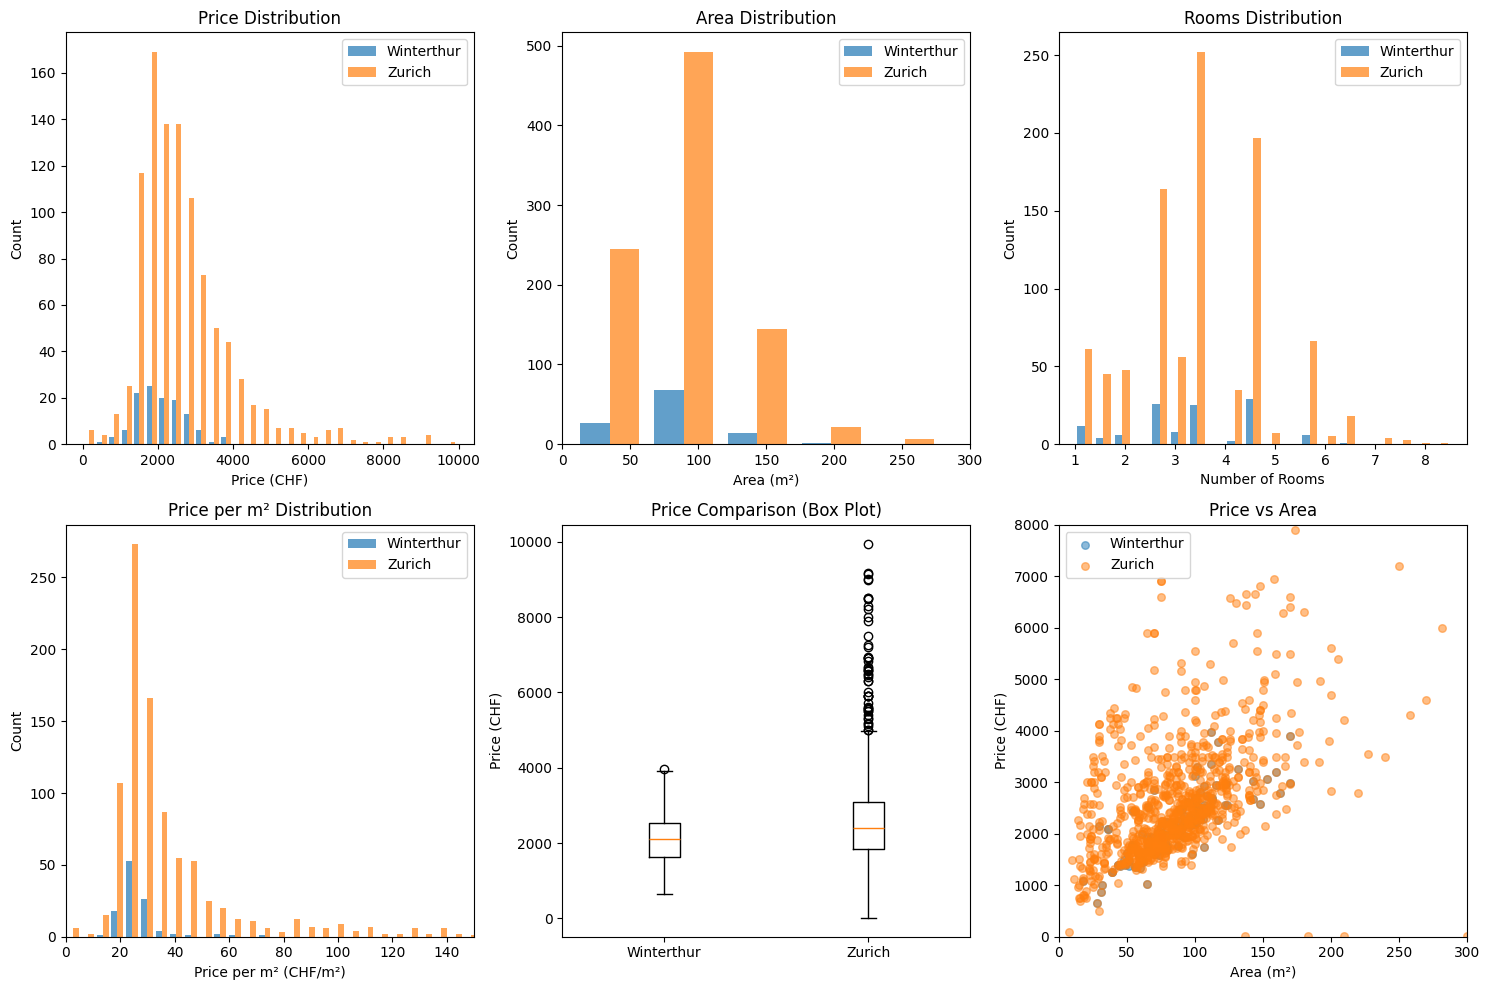

Visualizations complete!


In [6]:
# Optional: Create visualizations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Price comparison
axes[0, 0].hist([df_winterthur['price'].dropna(), df_zuerich['price'].dropna()], 
               label=['Winterthur', 'Zurich'], bins=30, alpha=0.7)
axes[0, 0].set_xlabel('Price (CHF)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Price Distribution')
axes[0, 0].legend()

# Area comparison
axes[0, 1].hist([df_winterthur['area'].dropna(), df_zuerich['area'].dropna()], 
               label=['Winterthur', 'Zurich'], bins=30, alpha=0.7)
axes[0, 1].set_xlabel('Area (m²)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Area Distribution')
axes[0, 1].set_xlim(0, 300)
axes[0, 1].legend()

# Rooms comparison
axes[0, 2].hist([df_winterthur['rooms'].dropna(), df_zuerich['rooms'].dropna()], 
               label=['Winterthur', 'Zurich'], bins=20, alpha=0.7)
axes[0, 2].set_xlabel('Number of Rooms')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Rooms Distribution')
axes[0, 2].legend()

# Price per m² comparison
axes[1, 0].hist([df_winterthur['price_per_m2'].dropna(), df_zuerich['price_per_m2'].dropna()], 
               label=['Winterthur', 'Zurich'], bins=30, alpha=0.7)
axes[1, 0].set_xlabel('Price per m² (CHF/m²)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Price per m² Distribution')
axes[1, 0].set_xlim(0, 150)
axes[1, 0].legend()

# Box plot comparison - prices
data_to_plot = [df_winterthur['price'].dropna(), df_zuerich['price'].dropna()]
axes[1, 1].boxplot(data_to_plot, tick_labels=['Winterthur', 'Zurich'])
axes[1, 1].set_ylabel('Price (CHF)')
axes[1, 1].set_title('Price Comparison (Box Plot)')

# Scatter plot - Price vs Area
wt_clean = df_winterthur[['area', 'price']].dropna()
zu_clean = df_zuerich[['area', 'price']].dropna()

axes[1, 2].scatter(wt_clean['area'], wt_clean['price'], 
                  alpha=0.5, s=30, label='Winterthur')
axes[1, 2].scatter(zu_clean['area'], zu_clean['price'], 
                  alpha=0.5, s=30, label='Zurich')
axes[1, 2].set_xlabel('Area (m²)')
axes[1, 2].set_ylabel('Price (CHF)')
axes[1, 2].set_title('Price vs Area')
axes[1, 2].set_xlim(0, 300)
axes[1, 2].set_ylim(0, 8000)
axes[1, 2].legend()

plt.tight_layout()
plt.show()

print("Visualizations complete!")